In [3]:
import math
import scipy.stats
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [4]:
def p_value_DP_audit(m, r, v, eps, delta = 1e-5):
    """args: delta a float between 0 and 1"""
    assert 0 <= v <= r <= m
    assert eps >= 0
    assert 0 <= delta <= 1
    
    q = 1/(1 + math.exp(-eps))  # accuracy of eps-DP randomized response
    beta = scipy.stats.binom.sf(v-1, r, q)  # P[Binomial(r, q) >= v]
    alpha = 0
    sum_prob = 0  # P[v > Binomial(r, q) >= v - i]
    
    for i in range(1, v + 1):
        sum_prob += scipy.stats.binom.pmf(v - i, r, q)
        if sum_prob > i * alpha:
            alpha = sum_prob / i
    
    p = beta + alpha * delta * 2 * m
    return min(p, 1)

In [5]:
def get_eps_audit(m, r, v, p, delta = 1e-5):
    """args: delta a float between 0 and 1"""
    assert 0 <= v <= r <= m
    assert 0 <= delta <= 1
    assert 0 < p < 1
    
    eps_min = 0  # maintain p_value_DP(eps_min) < p
    eps_max = 1  # maintain p_value_DP(eps_max) >= p
    
    while p_value_DP_audit(m, r, v, eps_max, delta) < p:
        eps_max += 1
        
    for _ in range(30):  # binary search
        eps = (eps_min + eps_max) / 2
        if p_value_DP_audit(m, r, v, eps, delta) < p:
            eps_min = eps
        else:
            eps_max = eps
            
    return eps_min





In [6]:
eps = []
correct_v =np.arange(50,80, step = 5)
for v in tqdm(correct_v):
    eps.append(get_eps_audit(100,80,v,0.05))




  0%|          | 0/6 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Relationship between number of Correct Guesses and Epsilon')

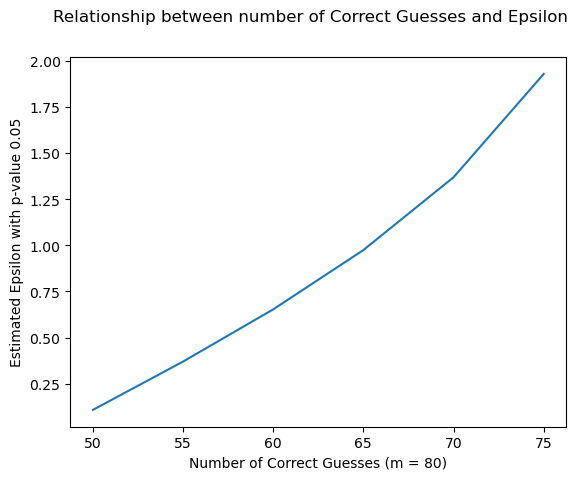

In [7]:
plt.plot(correct_v, eps)
plt.xlabel("Number of Correct Guesses (m = 80)")
plt.ylabel("Estimated Epsilon with p-value 0.05")
plt.suptitle("Relationship between number of Correct Guesses and Epsilon")

In [26]:
np.floor(i*0.8)

0.0

In [36]:
np.exp(1.2539840936660767)/(1 + np.exp(1.2539840936660767))

0.7779887648559206

In [35]:
get_eps_audit(1e3, 1e3,  math.floor(1e3*0.8), 0.05)

/Users/chasemathis/opt/anaconda3/envs/HarvardSIBMI/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


1.2539840936660767

In [28]:
eps_estimate = []
for i in range(1,100, 5):
    eps = get_eps_audit(100, i,  math.floor(i*0.8), 0.05)
    eps_estimate.append(eps)

Text(0.5, 1.0, 'With constant Guess Correct Rate')

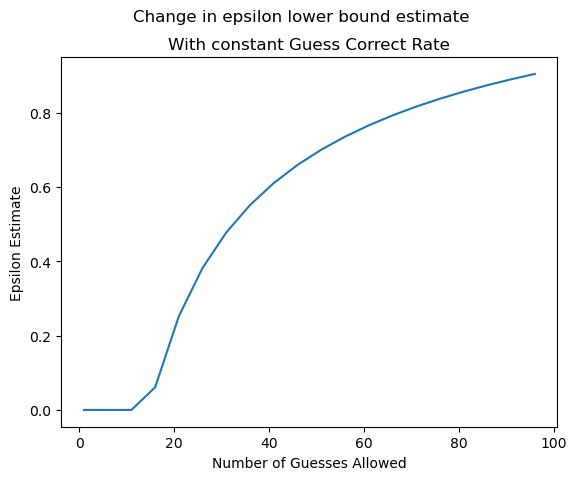

In [34]:
plt.plot(range(1,100, 5), eps_estimate)
plt.ylabel("Epsilon Estimate")
plt.xlabel("Number of Guesses Allowed")
plt.suptitle("Change in epsilon lower bound estimate")
plt.title("With constant Guess Correct Rate")

In [78]:
def decay(x, r):
    return -1/r * x + 1


In [79]:
eps_estimate = []
for i in range(1,1000,1):
    eps = get_eps_audit(1000, i,  math.floor(i*decay(i, 1000)), 0.05)
    eps_estimate.append(eps)

KeyboardInterrupt: 

Text(0.5, 1.0, 'With Guess Correct Rate of -1/100 *x + 1')

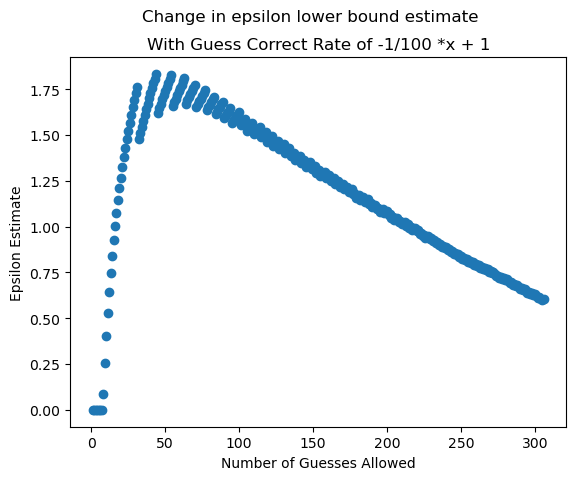

In [83]:
plt.scatter(range(1,len(eps_estimate)+1,1), eps_estimate)
plt.ylabel("Epsilon Estimate")
plt.xlabel("Number of Guesses Allowed")
plt.suptitle("Change in epsilon lower bound estimate")
plt.title("With Guess Correct Rate of -1/100 *x + 1")